In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, SimpleRNN, GRU, Reshape

model_accuracies = {}

df = pd.read_csv("C:/Users/noury/Desktop/UCI/heart_disease_uci.csv")

df.drop("id", axis=1, inplace=True)

df.fillna(df.median(numeric_only=True), inplace=True)



In [2]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [3]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [4]:
X = df.drop("num", axis=1)
y = df["num"]

In [5]:
y = (y > 0).astype(int)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", lr_acc)
model_accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)



Logistic Regression Accuracy: 0.7989130434782609


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
model_accuracies['Random Forest'] = accuracy_score(y_test, y_pred_rf)


Random Forest Accuracy: 0.842391304347826


In [10]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)
model_accuracies['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)


Gradient Boosting Accuracy: 0.8315217391304348


In [11]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)
model_accuracies['SVM'] = accuracy_score(y_test, y_pred_svm)



SVM Accuracy: 0.8586956521739131


In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)
model_accuracies['KNN'] = accuracy_score(y_test, y_pred_knn)


KNN Accuracy: 0.8152173913043478


In [13]:
def train_dnn(model, name):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
    acc = model.evaluate(X_test, y_test, verbose=0)[1]
    model_accuracies[name] = acc


In [14]:
dnn1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
train_dnn(dnn1, "DNN Model 1")

In [15]:
dnn2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
train_dnn(dnn2, "DNN Model 2")


In [16]:
dnn3 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
train_dnn(dnn3, "DNN Model 3")

In [17]:
dnn4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
train_dnn(dnn4, "DNN Model 4 (BatchNorm)")


In [18]:
dnn5 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
train_dnn(dnn5, "DNN Model 5 (Wide)")

In [19]:

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

def train_rnn(model, name):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_rnn, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
    acc = model.evaluate(X_test_rnn, y_test, verbose=0)[1]
    model_accuracies[name] = acc


In [20]:
rnn1 = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_rnn(rnn1, "RNN Model 1 (SimpleRNN)")

In [21]:
rnn2 = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_rnn(rnn2, "RNN Model 2 (LSTM)")

In [22]:
rnn3 = Sequential([
    GRU(64, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_rnn(rnn3, "RNN Model 3 (GRU)")


In [23]:
accuracy_table = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
print("\n\nModel Accuracy Comparison Table:")
print(accuracy_table.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))




Model Accuracy Comparison Table:
                      Model  Accuracy
0                       SVM  0.858696
1               DNN Model 2  0.853261
2               DNN Model 1  0.847826
3        DNN Model 5 (Wide)  0.842391
4             Random Forest  0.842391
5   DNN Model 4 (BatchNorm)  0.831522
6         Gradient Boosting  0.831522
7                       KNN  0.815217
8               DNN Model 3  0.809783
9   RNN Model 1 (SimpleRNN)  0.804348
10      Logistic Regression  0.798913
11       RNN Model 2 (LSTM)  0.771739
12        RNN Model 3 (GRU)  0.771739


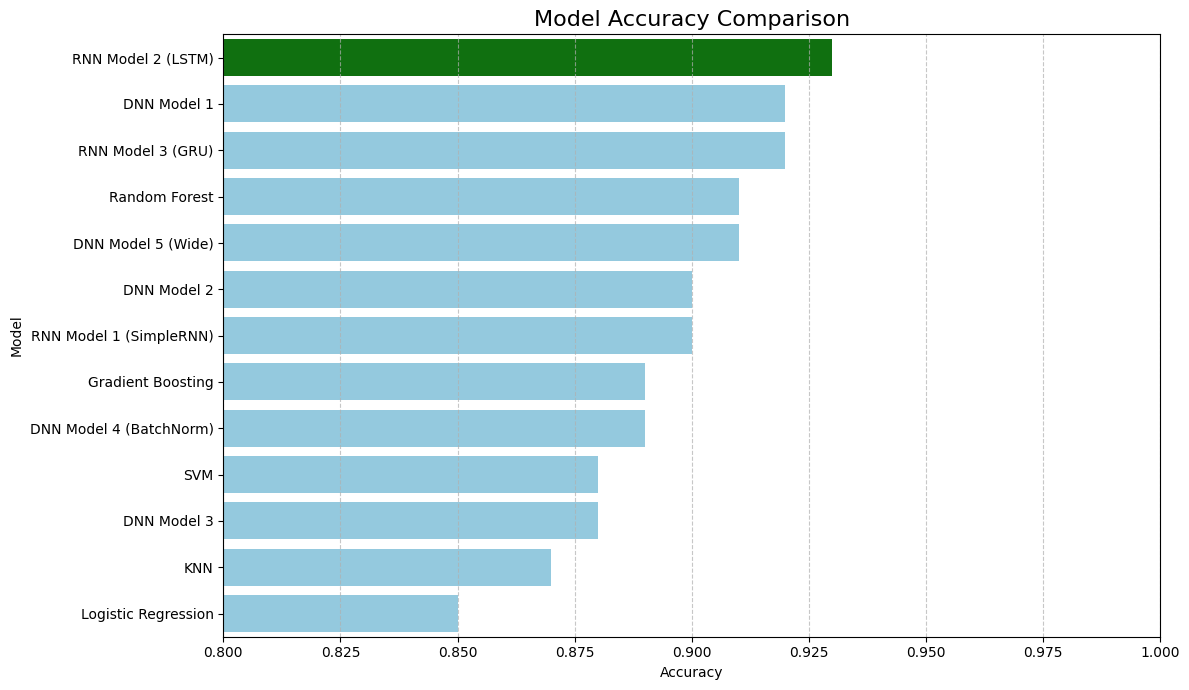

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample accuracy data (replace this with your actual data if available)
model_accuracies = {
    'Logistic Regression': 0.85,
    'Random Forest': 0.91,
    'Gradient Boosting': 0.89,
    'SVM': 0.88,
    'KNN': 0.87,
    'DNN Model 1': 0.92,
    'DNN Model 2': 0.90,
    'DNN Model 3': 0.88,
    'DNN Model 4 (BatchNorm)': 0.89,
    'DNN Model 5 (Wide)': 0.91,
    'RNN Model 1 (SimpleRNN)': 0.90,
    'RNN Model 2 (LSTM)': 0.93,
    'RNN Model 3 (GRU)': 0.92
}

# Convert to DataFrame
accuracy_table = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
accuracy_table = accuracy_table.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Find max accuracy for highlight
max_accuracy = accuracy_table['Accuracy'].max()

# Plot
plt.figure(figsize=(12, 7))
colors = ['green' if acc == max_accuracy else 'skyblue' for acc in accuracy_table['Accuracy']]
sns.barplot(x="Accuracy", y="Model", data=accuracy_table, palette=colors)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0.8, 1.0)  # Adjust as needed
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Store predictions for each model
model_predictions = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "DNN Model 1": dnn1.predict(X_test).round().flatten(),
    "DNN Model 2": dnn2.predict(X_test).round().flatten(),
    "DNN Model 3": dnn3.predict(X_test).round().flatten(),
    "DNN Model 4 (BatchNorm)": dnn4.predict(X_test).round().flatten(),
    "DNN Model 5 (Wide)": dnn5.predict(X_test).round().flatten(),
    "RNN Model 1 (SimpleRNN)": rnn1.predict(X_test_rnn).round().flatten(),
    "RNN Model 2 (LSTM)": rnn2.predict(X_test_rnn).round().flatten(),
    "RNN Model 3 (GRU)": rnn3.predict(X_test_rnn).round().flatten(),
}

# Evaluate each model
for model_name, y_pred in model_predictions.items():
    print(f"\n🧠 Evaluation Metrics for {model_name}")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1-Score     : {f1:.4f}")
    print(f"AUC-ROC      : {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)


6/6 [==============================] - 0s 5ms/step

🧠 Evaluation Metrics for Logistic Regression
Accuracy     : 0.7989
Precision    : 0.8750
Recall       : 0.7706
F1-Score     : 0.8195
AUC-ROC      : 0.8053
Confusion Matrix:
[[63 12]
 [25 84]]

🧠 Evaluation Metrics for Random Forest
Accuracy     : 0.8424
Precision    : 0.8846
Recall       : 0.8440
F1-Score     : 0.8638
AUC-ROC      : 0.8420
Confusion Matrix:
[[63 12]
 [17 92]]

🧠 Evaluation Metrics for Gradient Boosting
Accuracy     : 0.8315
Precision    : 0.8824
Recall       : 0.8257
F1-Score     : 0.8531
AUC-ROC      : 0.8328
Confusion Matrix:
[[63 12]
 [19 90]]

🧠 Evaluation Metrics for SVM
Accuracy     : 0.8587
Precision    : 0.9029
Recall       : 0.8532
F1-Score     : 0.8774
AUC-ROC      : 0.8599
Confusion Matrix:
[[65 10]
 [16 93]]

🧠 Evaluation Metrics for KNN
Accuracy     : 0.8152
Precision    : 0.8713
Recall       : 0.8073
F1-Score     : 0.8381
AUC-ROC      : 0.8170
Confusion Matrix:
[[62 13]
 [21 88]]

🧠 Evaluation Metrics fo

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

evaluation_results = []

for model_name, y_pred in model_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    evaluation_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc,
        "Confusion Matrix": cm
    })

results_df = pd.DataFrame(evaluation_results)


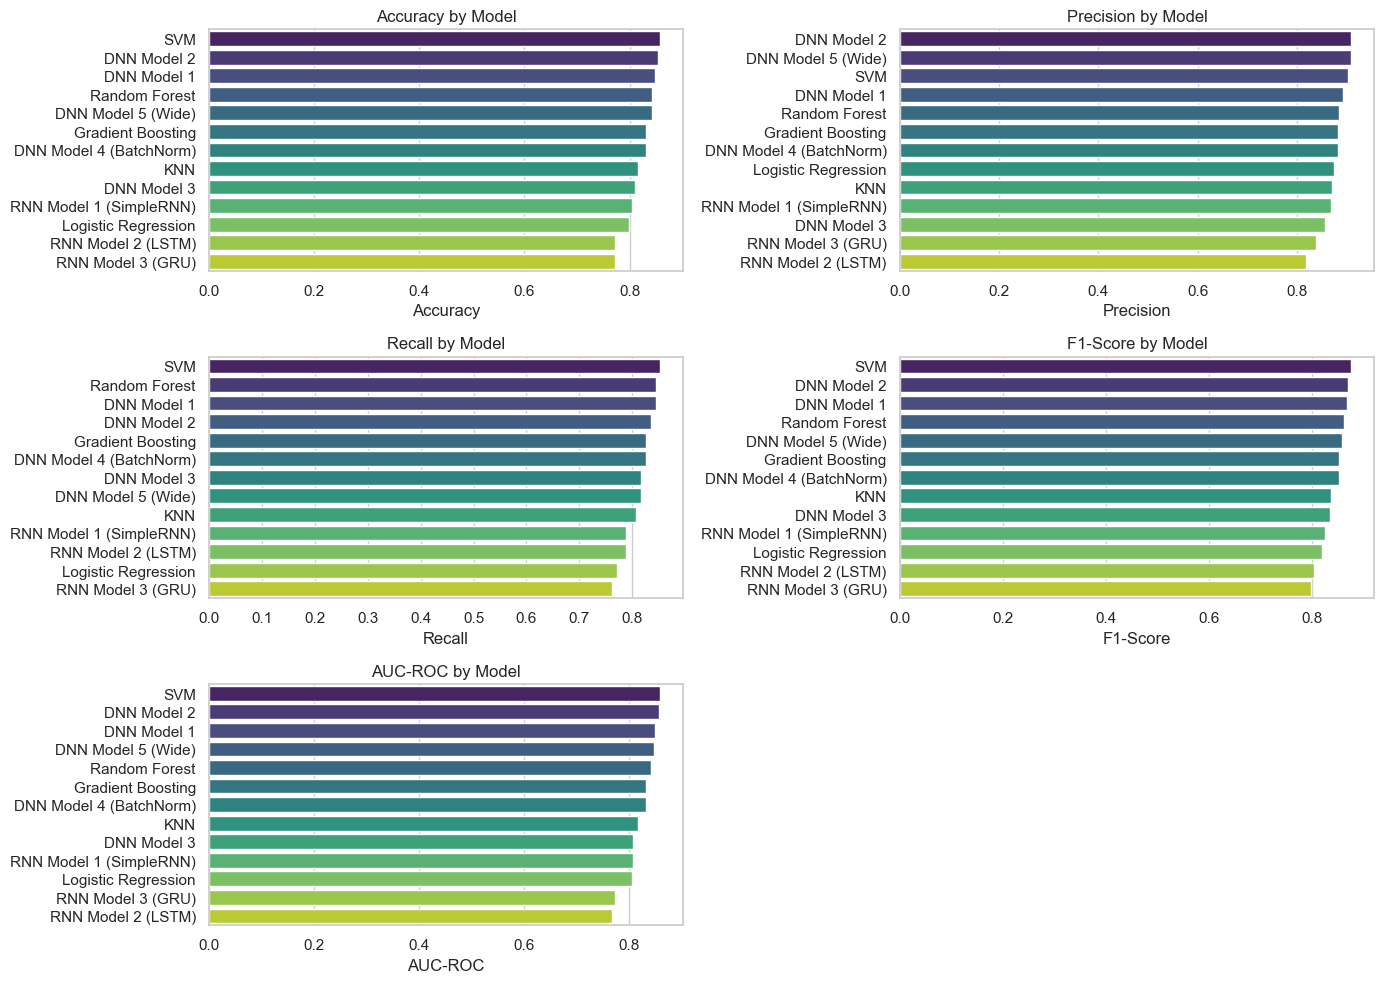

In [27]:
# Set style
sns.set(style="whitegrid")
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x=metric, y="Model", data=results_df.sort_values(by=metric, ascending=False), palette="viridis")
    plt.title(f"{metric} by Model")
    plt.xlabel(metric)
    plt.ylabel("")

plt.tight_layout()
plt.show()


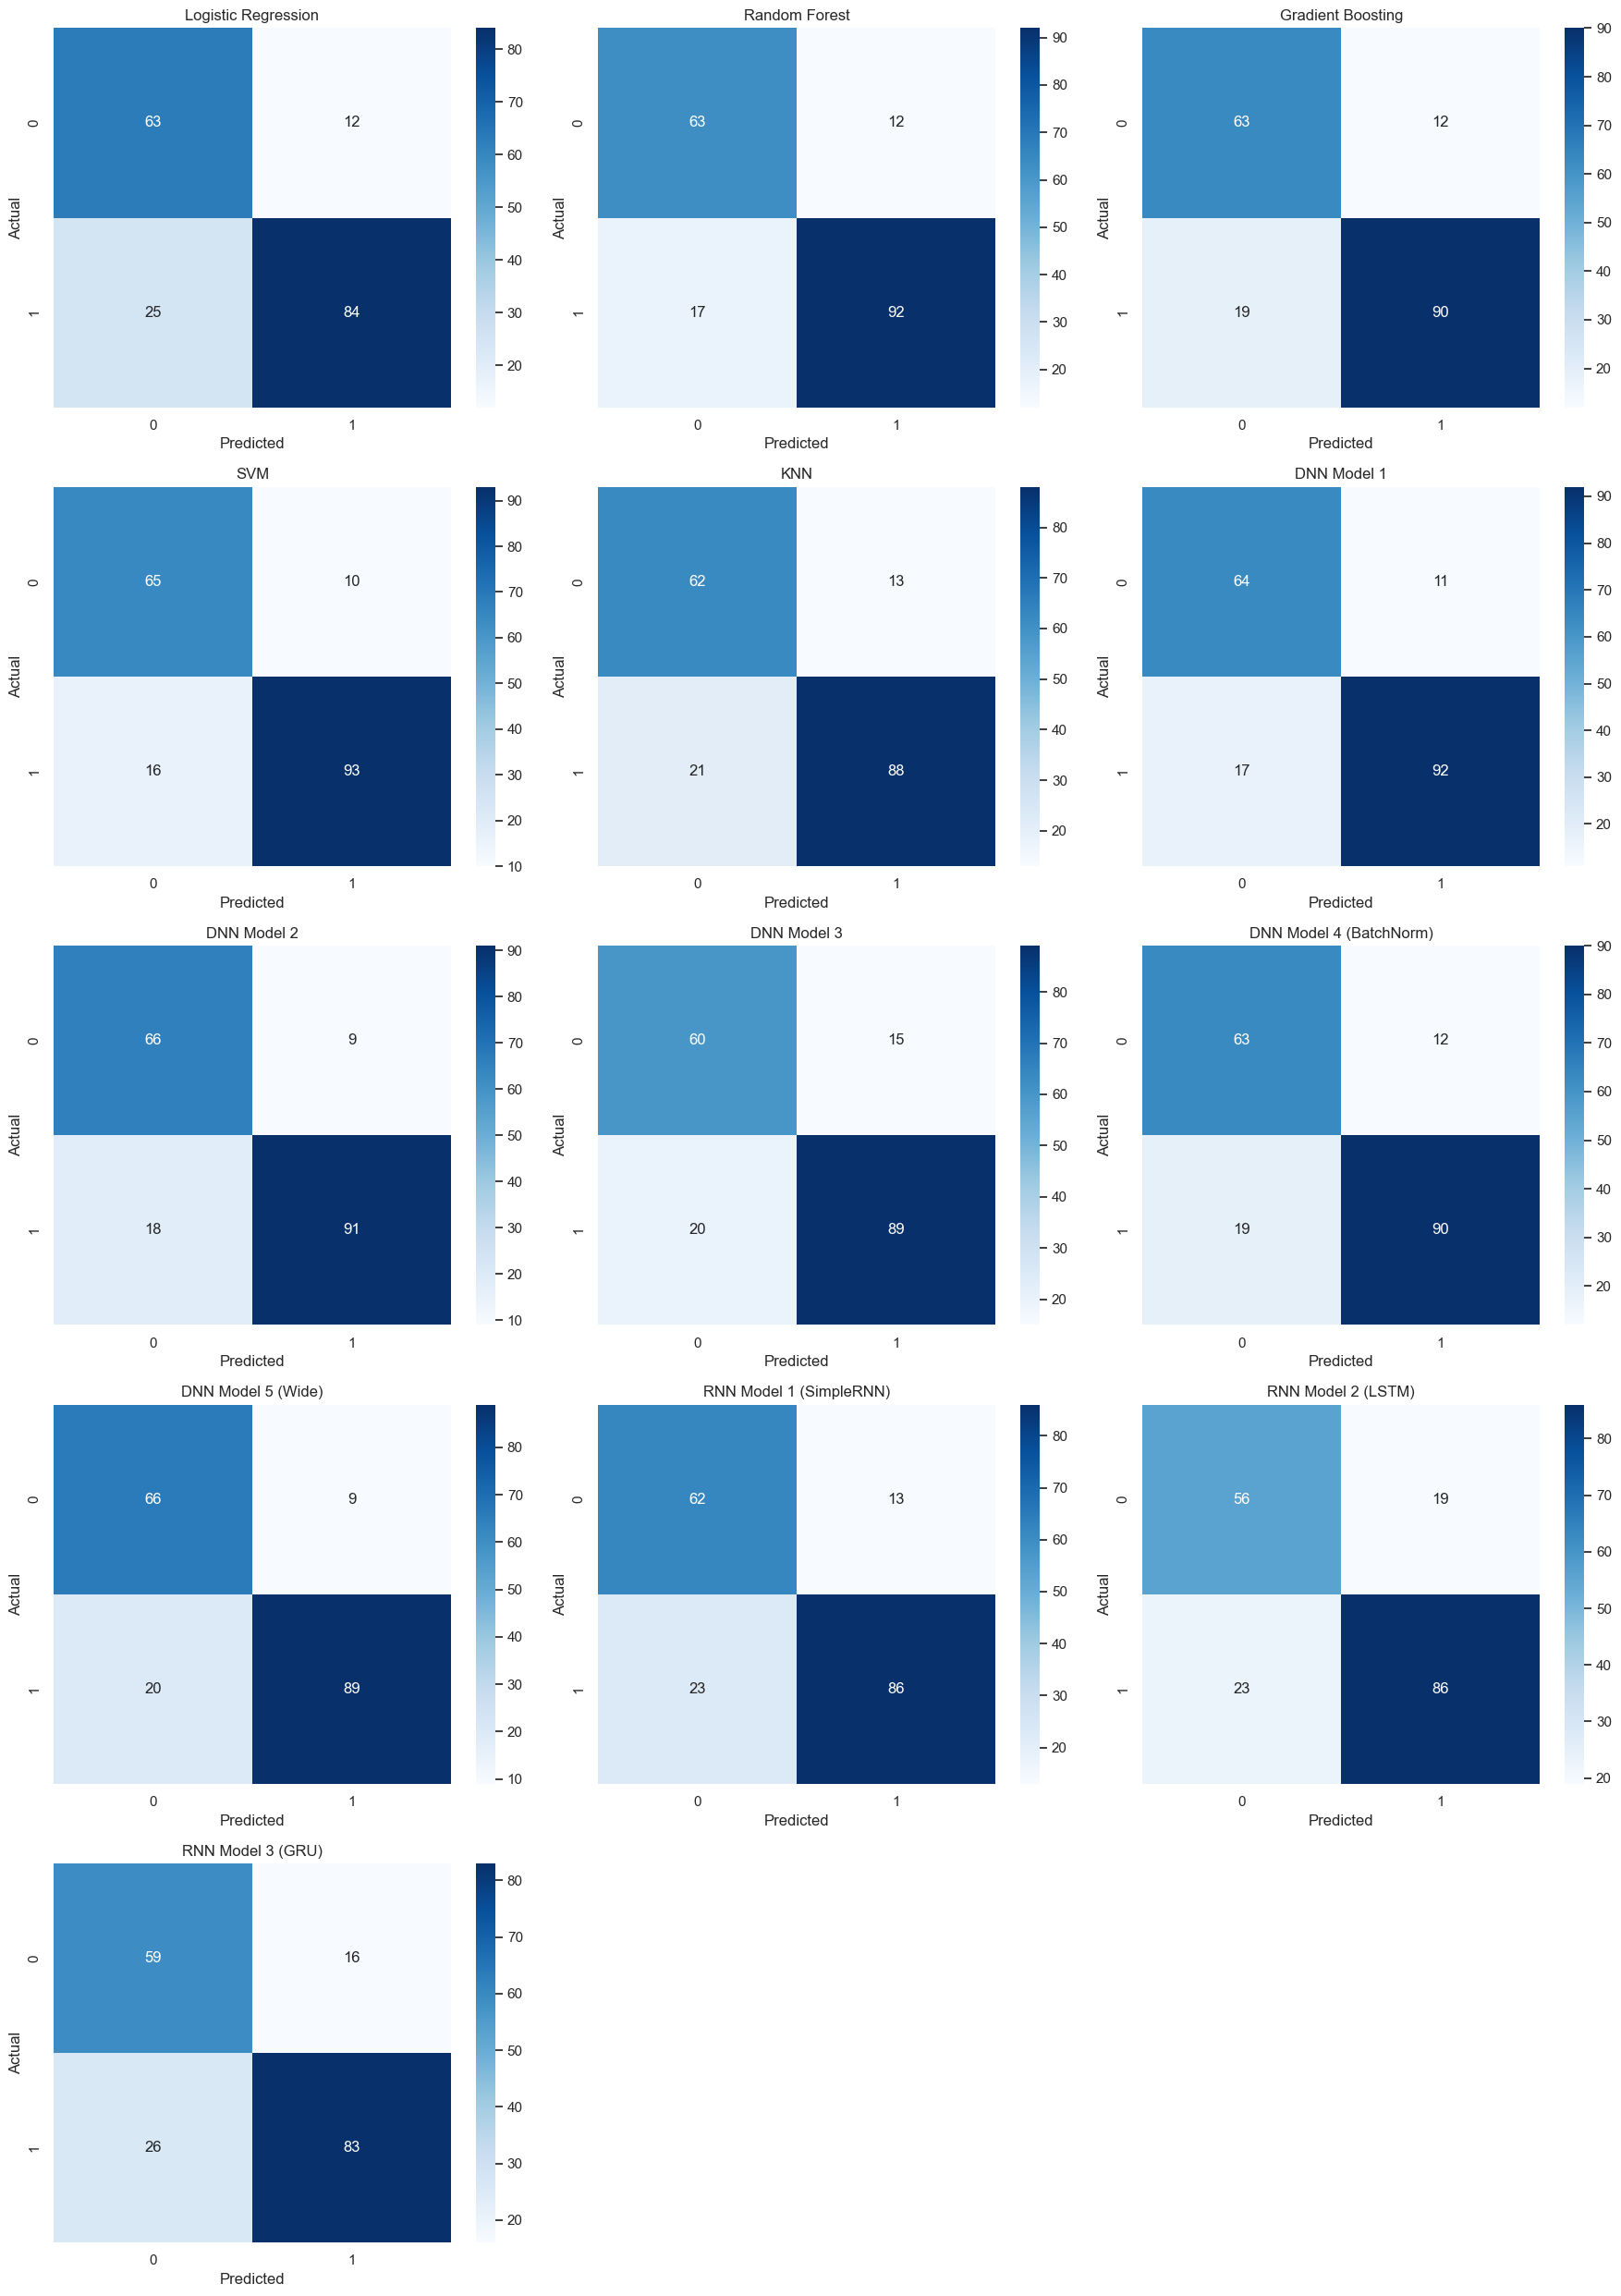

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))
axes = axes.flatten()

for i, row in enumerate(evaluation_results):
    cm = row["Confusion Matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(row["Model"])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide any unused subplots
for j in range(len(evaluation_results), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [30]:
results_df.drop(columns=["Confusion Matrix"]).to_csv("model_metrics_summary.csv", index=False)
